In [ ]:
import pandas as pd
import numpy as np # For Array and Matrix
from sklearn.model_selection import train_test_split # For Splitting Data
from sklearn import metrics # For Accuracy
from sklearn import svm # For SVM Model
from sklearn.neighbors import KNeighborsClassifier # For KNN Model
from sklearn.naive_bayes import MultinomialNB # For Multinomial Naive Bayes Model
from sklearn import tree # For Decision Tree Model
from sklearn.model_selection import cross_val_score # For Cross Validation
# import the necessary libraries
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from google.colab import files
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier



In [ ]:
# displays output inline
%matplotlib inline

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bharathkumarrouthu","key":"017247bd1d1db79f34aa3564f7b8513f"}'}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36           1170        778  0.9375           
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00           1242        721  0.875            
datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           4369        109  1.0              


In [ ]:
! kaggle competitions download -c 'digit-recognizer'

 59% 9.00M/15.3M [00:00<00:00, 61.5MB/s]
100% 15.3M/15.3M [00:00<00:00, 80.7MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip digit-recognizer.zip -d train

Archive:  digit-recognizer.zip
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train=pd.read_csv('/content/train/train.csv')
test=pd.read_csv('/content/train/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test=test.astype('float32')/255.0
test=test.values.reshape(-1,28,28)
print(test.shape)

(28000, 28, 28)


In [ ]:
in_train = train.drop(columns=['label'])
out_train = train['label']

In [ ]:
in_train = in_train.values.reshape(-1,28,28)

print(in_train.shape)
    

(42000, 28, 28)


In [ ]:
in_train.shape,  np.unique(out_train)

((42000, 28, 28), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
# scale the values between 0 and 1 for both training and validation sets
in_train = in_train / 255.0

In [ ]:
# define ten categories from 0 to 9
class_names = {index:cn for index, cn in enumerate(['Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine'])}

How many rows of training images would you like to review?1


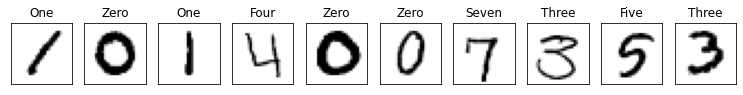

In [ ]:
def plot(images, labels, predictions=None):
    # create a grid with 10 columns
    n_cols = min(10, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows + 2))
    if predictions is None:
        predictions = [None] * len(labels)
    for index, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[index]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(class_names[y_true])
        if y_pred is not None:
            ax.set_xlabel(class_names[y_pred])
        ax.set_xticks([])
        ax.set_yticks([])

# plot first 20 images
rows = int(input("How many rows of training images would you like to review?"))
plot(in_train[:10*rows], out_train[:10*rows])   

In [ ]:
np.random.seed(37)
tf.random.set_seed(5678)

In [ ]:
in_train, in_valid, out_train, out_valid = train_test_split(in_train,out_train , test_size=0.2)

In [ ]:
tf.random.set_seed(21)

In [ ]:
def build_clf(optimizer = "adam"):
    model = keras.Sequential(layers=[
    keras.layers.Conv2D(128, kernel_size=(5, 5),input_shape=(28,28,1),activation='relu'),                             
    keras.layers.Conv2D(128, kernel_size=(5, 5),activation='relu'),                             
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, kernel_size=(5, 5),activation='relu'),
    keras.layers.Conv2D(128, kernel_size=(5, 5),activation='relu'),                                                          
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy","categorical_accuracy"])
    return model
model = KerasClassifier(build_fn=build_clf, verbose=0)
batch_size = [80,85,90]
epochs = [20,25,30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(in_train, out_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.990476 using {'batch_size': 85, 'epochs': 25}
0.988976 (0.001477) with: {'batch_size': 80, 'epochs': 20}
0.989881 (0.002450) with: {'batch_size': 80, 'epochs': 25}
0.990452 (0.001400) with: {'batch_size': 80, 'epochs': 30}
0.988881 (0.000792) with: {'batch_size': 85, 'epochs': 20}
0.990476 (0.002251) with: {'batch_size': 85, 'epochs': 25}
0.988690 (0.000936) with: {'batch_size': 85, 'epochs': 30}
0.989262 (0.001820) with: {'batch_size': 90, 'epochs': 20}
0.987857 (0.001681) with: {'batch_size': 90, 'epochs': 25}
0.989619 (0.003157) with: {'batch_size': 90, 'epochs': 30}


In [ ]:
loss, accuracy, cat_acc = model.evaluate(in_valid, out_valid) 

263/263 [==============================] - 2s 6ms/step - loss: 0.0589 - accuracy: 0.9910 - categorical_accuracy: 0.1013


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       409728    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

In [ ]:
#mode
model = keras.Sequential(layers=[
  keras.layers.Conv2D(128, (3, 3), activation='relu',  input_shape=(28, 28, 1)),
	keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),
	keras.layers.Flatten(),
	keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(in_train, out_train, batch_size=60, epochs=10, validation_split=0.2)

In [ ]:
# predict the validation set
probs = model.predict(in_valid)
preds = model.predict(in_valid).argsort()[:,-1]
print(preds)

[8 9 4 ... 0 5 1]


How many rows of testing images would you like to review?2


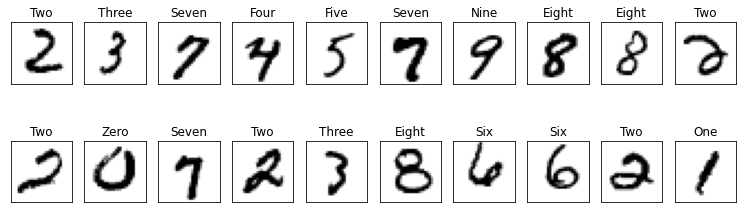

In [ ]:
# plot 10*rows random data
rows = int(input("How many rows of testing images would you like to review?"))
rand_idxs = np.random.permutation(len(in_valid))[:10*rows]
plot(in_valid[rand_idxs], preds[rand_idxs])

In [ ]:
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_valid) - 1, description="Image index")
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    #1. increasing figsize
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(in_valid[index], cmap=plt.cm.binary)
    #ax1.set_title("label: %s" % class_names[out_valid[index]])
    #2. label with defined fontsize
    ax1.set_xlabel("predict: %s" % class_names[preds[index]],fontsize =12)
    #3. move the x-axis and ticks to the top of the axis
    ax1.xaxis.tick_top() 
    ax2.bar(x=[class_names[index] for index in range(10)], height=probs[index]*100)
    plt.xticks(rotation=90)
    #4. make y axis range from 0 - 100 (% values)
    plt.ylim(1,100)
    #5. adding title to the Sub Plot
    ax2.set_title("Percentage(%) Prediction of Number")
    #6. Main Title
    plt.suptitle("Test Data Images and Predicition Accuracies",fontsize = 20,fontweight = "bold")

interactive(children=(IntSlider(value=0, description='Image index', max=8399), Output()), _dom_classes=('widge…

In [ ]:
submission_label = np.argmax(model.predict(test), axis=1)
submission_label = pd.Series(submission_label, name="Label")

image_id = pd.Series(range(1,len(test)+1))
image_id = pd.Series(image_id, name="ImageId")

In [ ]:
submission = pd.concat([image_id,submission_label],axis = 1)
submission.to_csv("submission_v7.csv", index=False)
pd.read_csv("submission_v7.csv").head()
files.download('submission_v7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

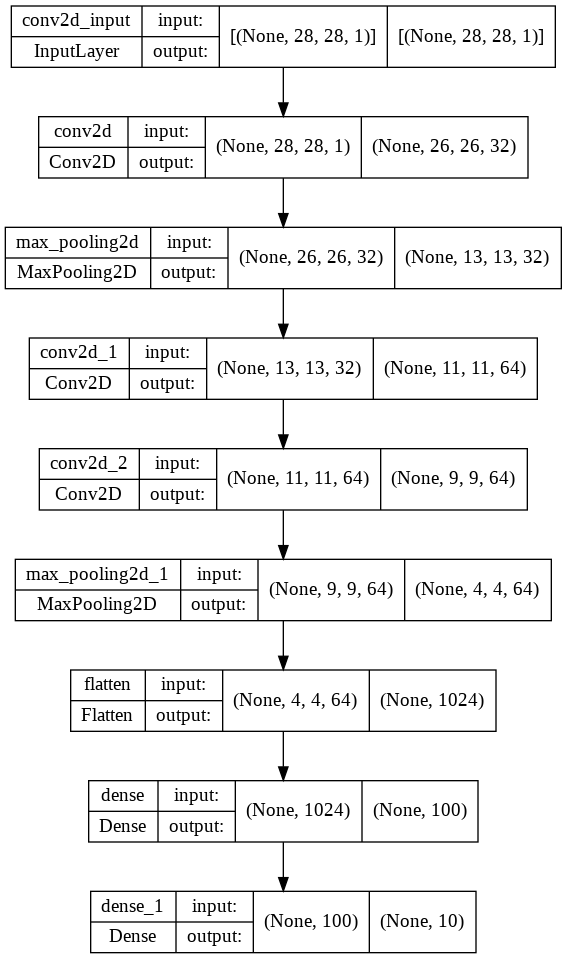

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()